In [116]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
from tensorflow.keras.models import Sequential

In [118]:

mnist = tf.keras.datasets.mnist

In [119]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [120]:
x_train[0].shape
# all the images in size  28*28

(28, 28)

In [121]:
pd.DataFrame(y_train).value_counts()
# this is our dependent variable

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

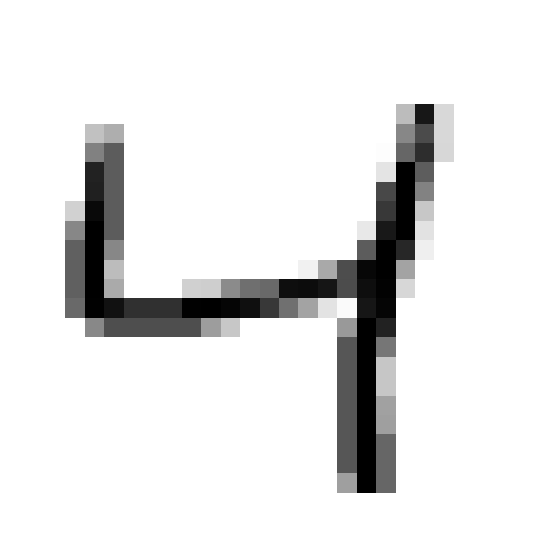

In [122]:
plt.imshow(x_train[2],cmap='binary')
plt.axis(False)
# plt.axis('off')
plt.show()


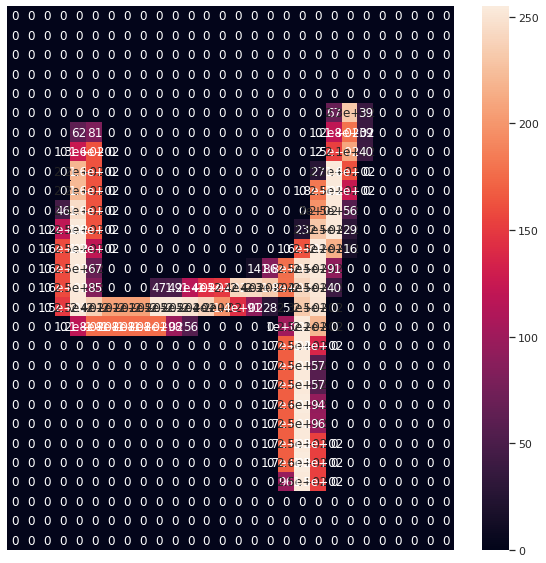

4

In [123]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x_train[2] , annot=True)
plt.axis('off')
plt.show()
y_train[2]

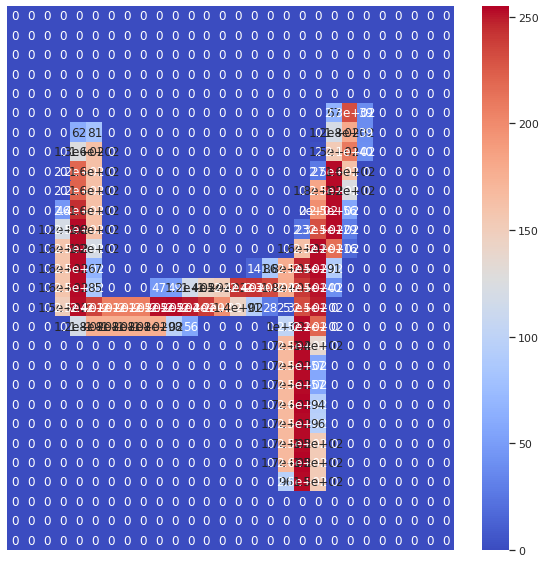

4

In [124]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x_train[2] , annot=True,cmap='coolwarm')
plt.axis('off')
plt.show()
y_train[2]

In [125]:

x_train.shape

(60000, 28, 28)

In [126]:

c=10

In [127]:
a,b = c/2.,c*2

In [128]:
b

20

validate the x_train and y_train data

In [129]:

x_valid,x_train = x_train[:5000]/255. , x_train[5000:]/255.

In [130]:
y_valid,y_train = y_train[0:5000]/255. , y_train[5000:]/255.

In [131]:
x_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [132]:
x_valid.shape

(5000, 28, 28)

In [133]:
x_train.shape

(55000, 28, 28)

In [134]:
y_valid

array([0.01960784, 0.        , 0.01568627, ..., 0.00784314, 0.00392157,
       0.00784314])

In [135]:

y_train

array([0.02745098, 0.01176471, 0.01568627, ..., 0.01960784, 0.02352941,
       0.03137255])

In [136]:
y_train.shape

(55000,)

In [137]:
y_valid.shape

(5000,)

define the layers for network


In [138]:
LAYER = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
          tf.keras.layers.Dense(units=300,activation='relu',name='hiddenlayer1'),
         tf.keras.layers.Dense(units = 100,activation='relu',name='hiddenlayer2'),
         tf.keras.layers.Dense(units = 10, activation ='softmax',name ='outputlayer')]

In [139]:
model = tf.keras.models.Sequential(LAYER)

In [140]:
model.layers

In [141]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [142]:
784*300+300
# param = in*neuron=bias

235500

In [143]:
model.layers[1]

In [144]:
name_of_layer = model.get_layer(model.layers[1].name)
name_of_layer

In [145]:
weight, bias = name_of_layer.get_weights()

In [146]:
print(weight.shape)
weight

(784, 300)


array([[-0.06745929,  0.01785205,  0.020285  , ..., -0.03338548,
        -0.06807966,  0.03039184],
       [ 0.06249945, -0.04873113,  0.04800043, ..., -0.07271415,
        -0.05381888,  0.00916192],
       [-0.06097519, -0.014081  ,  0.06655027, ...,  0.02248736,
        -0.04024522, -0.02426528],
       ...,
       [ 0.04808913, -0.00495562,  0.06400667, ..., -0.02741309,
        -0.0013644 ,  0.04773139],
       [-0.05500265,  0.03804649,  0.06689183, ...,  0.06844562,
        -0.05673472,  0.04600479],
       [-0.04155046, -0.03846026, -0.06018947, ..., -0.02360899,
         0.02040046, -0.05759055]], dtype=float32)

In [147]:
print(bias.shape)
bias

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [148]:

pd.DataFrame(bias).value_counts()

0.0    300
dtype: int64

In [149]:
LOss_function = 'sparse_categorical_crossentropy'         # for multiclass classification
OPtimizer = 'SGD'              # Adam is a good optimizer
MEtric = ['accuracy']

In [150]:
model.compile(loss=LOss_function,optimizer = OPtimizer,metrics=MEtric)

In [151]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.0988 - val_loss: 5.8494e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 4.3506e-04 - accuracy: 0.0990 - val_loss: 2.6786e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.4156e-04 - accuracy: 0.0990 - val_loss: 1.7025e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 1.6638e-04 - accuracy: 0.0990 - val_loss: 1.2360e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2640e-04 - accuracy: 0.0990 - val_loss: 9.6431e-05 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 1.0164e-04 - accuracy: 0.0990 - val_loss: 7.8764e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.4834e-05 - acc

validate the images by 

In [152]:
history.history

{'loss': [0.019243977963924408,
  0.00043506050133146346,
  0.00024156026483979076,
  0.00016638336819596589,
  0.00012640278146136552,
  0.00010163658589590341,
  8.48342533572577e-05,
  7.270395872183144e-05,
  6.35506003163755e-05,
  5.6401426263619214e-05,
  5.066644007456489e-05,
  4.596645158017054e-05,
  4.204861033940688e-05,
  3.873196692438796e-05,
  3.588977415347472e-05,
  3.3427204471081495e-05,
  3.127258605672978e-05,
  2.9373664801823907e-05,
  2.7688713089446537e-05,
  2.618244798213709e-05,
  2.4828243113006465e-05,
  2.3603955924045295e-05,
  2.2493328287964687e-05,
  2.1479734641616233e-05,
  2.0551649868139066e-05,
  1.969959521375131e-05,
  1.8913589883595705e-05,
  1.8186779925599694e-05,
  1.7512542399344966e-05,
  1.6886231605894864e-05],
 'accuracy': [0.09880000352859497,
  0.0989818200469017,
  0.0989818200469017,
  0.0989818200469017,
  0.0989818200469017,
  0.0989818200469017,
  0.0989818200469017,
  0.0989818200469017,
  0.0989818200469017,
  0.09898182004

In [153]:
history = pd.DataFrame(history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.019244,0.098800,0.000585,0.0958
1,0.000435,0.098982,0.000268,0.0958
2,0.000242,0.098982,0.000170,0.0958
3,0.000166,0.098982,0.000124,0.0958
4,0.000126,0.098982,0.000096,0.0958
5,0.000102,0.098982,0.000079,0.0958
6,0.000085,0.098982,0.000066,0.0958
7,0.000073,0.098982,0.000057,0.0958
8,0.000064,0.098982,0.000050,0.0958
9,0.000056,0.098982,0.000045,0.0958


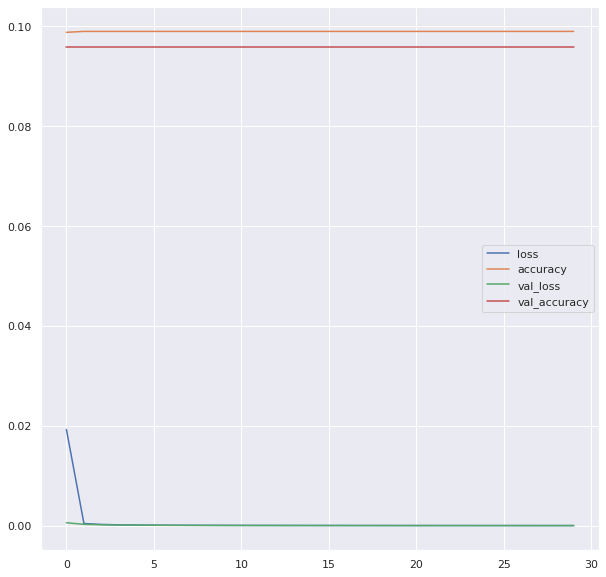

In [154]:
history.plot(figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'loss value decreasing')

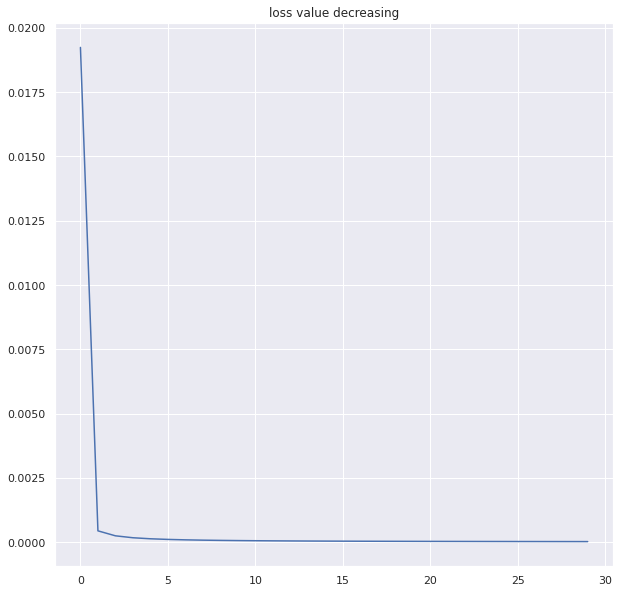

In [155]:
history['loss'].plot()
plt.title('loss value decreasing')

Text(0.5, 1.0, 'accuracy value increasing')

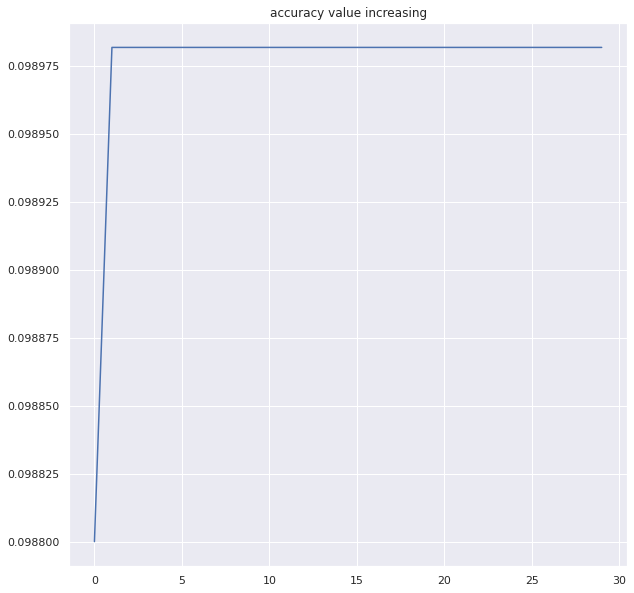

In [156]:
history['accuracy'].plot()
plt.title('accuracy value increasing')

**evaluate** the **model**

In [157]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4461.4736 - accuracy: 0.0980


[4461.4736328125, 0.09799999743700027]

save the model

In [179]:
model.save('/content/drive/MyDrive/ANN/mnist_modelbad_accurcy.h5')

load the model

In [159]:
loaded_model = tf.keras.models.load_model('mnist_model.h5')

In [160]:
loaded_model.evaluate(x_test,y_test)

# evaluate on testing dataset

313/313 [==============================] - 1s 2ms/step - loss: 4461.4736 - accuracy: 0.0980


[4461.4736328125, 0.09799999743700027]

In [161]:
loaded_model.evaluate(x_train,y_train)

# evaluate on training dataset

1719/1719 [==============================] - 5s 3ms/step - loss: 1.6586e-05 - accuracy: 0.0990


[1.6585870980634354e-05, 0.0989818200469017]

In [162]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [163]:
y_pred = loaded_model.predict(x_test)

In [164]:
y_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [165]:
y_pred.shape

(10000, 10)

In [166]:
y_test.shape

(10000,)

In [167]:
y_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [168]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [177]:
pd.DataFrame(y_pred)[0].value_counts()

1.0    10000
Name: 0, dtype: int64

# very bad accuracy i think somethink went wrong